## Importando Bibliotecas

In [2]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importando a Base de Dados

In [3]:
database = 'muse_v3.csv'
dados = pd.read_csv(database)

## Entendendo a Base de Dados

In [124]:
dados.shape

(90001, 11)

In [125]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90001 entries, 0 to 90000
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lastfm_url              90001 non-null  object 
 1   track                   90001 non-null  object 
 2   artist                  90001 non-null  object 
 3   seeds                   90001 non-null  object 
 4   number_of_emotion_tags  90001 non-null  int64  
 5   valence_tags            90001 non-null  float64
 6   arousal_tags            90001 non-null  float64
 7   dominance_tags          90001 non-null  float64
 8   mbid                    61217 non-null  object 
 9   spotify_id              61630 non-null  object 
 10  genre                   83362 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 7.6+ MB


In [126]:
dados.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal


In [127]:
dados.tail()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
89996,https://www.last.fm/music/gaby%2bhoffmann%2b%2...,Battle,Gaby Hoffmann & Jay Duplass,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89997,https://www.last.fm/music/omar%2brodriguez-lop...,Hands Tied to the Roots of a Hemorrhage,Omar Rodriguez-Lopez,['transparent'],4,5.797887,4.132254,5.570563,NaN,NaN,progressive rock
89998,https://www.last.fm/music/ace%2bwhite/_/crookf...,Crookfield Zoo,Ace White,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89999,https://www.last.fm/music/second%2bchyld/_/tra...,Transparent (Full Version),Second Chyld,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
90000,https://www.last.fm/music/message%2bto%2bbears...,Unfold,Message To Bears,['translucent'],2,3.340000,1.405000,3.500000,247179b0-af1f-4c2b-b4fe-751070d1c0cc,14BYEOeRb3jzglJmKX8eM2,ambient


In [128]:
dados.describe()

,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags
count,90001.000000,90001.000000,90001.000000,90001.000000
mean,3.987745,5.454280,4.317691,5.246029
std,4.153822,1.553079,1.154948,1.171096
min,1.000000,0.235000,0.108113,0.229231
25%,1.000000,4.277500,3.527500,4.550194
50%,2.000000,5.650000,4.330000,5.460000
75%,5.000000,6.696667,5.150000,6.115443
max,50.000000,8.475000,7.270000,7.440000


## Verificando Duplicados

Na página onde se encontra a Base de Dados, há um aviso de que se tem uma quantidade significativa de duplicadas. Então, vamos analisar como podemos fazer a limpeza.

[Página para a Base de Dados no Kaggle](https://www.kaggle.com/datasets/cakiki/muse-the-musical-sentiment-dataset)

Observe, na Base de Dados, que não faz sentido procurar as músicas duplicadas através das colunas: "seeds", "number_of_emotion_tags", "valence_tags", "arousal_tags", "dominance_tags", "genre". Vamos, portanto, analizar as demais colunas.

In [129]:
# verificando duplicados pela coluna "lastfm_url"
dados.duplicated("lastfm_url").sum()

0

In [130]:
# verificando duplicados pela coluna "mbid"
duplicate_mbid = dados[dados.duplicated("mbid")]
numero_linhas_duplicadas_mbid = duplicate_mbid.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_mbid)
numero_na_mbid = dados["mbid"].isna().sum()
print("Número de NaN:", numero_na_mbid)


Número de linhas duplicadas: 28783
Número de NaN: 28784


In [133]:
duplicate_mbid[["track", "mbid"]]

,track,mbid
6,Feedback,NaN
58,Wollt Ihr Das Bett In Flammen,NaN
72,"Hey, Cruel World...",NaN
86,Self vs Self,NaN
88,Roadblox,NaN
...,...,...
89995,RAINY,NaN
89996,Battle,NaN
89997,Hands Tied to the Roots of a Hemorrhage,NaN
89998,Crookfield Zoo,NaN


In [134]:
# verificando duplicados pela coluna "track"
duplicate_track = dados[dados.duplicated("track")]
numero_linhas_duplicadas_track = duplicate_track.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_track)
numero_na_track = dados["track"].isna().sum()
print("Número de NaN:", numero_na_track)

Número de linhas duplicadas: 10609
Número de NaN: 0


In [135]:
duplicate_track[["track", "artist"]]

,track,artist
79,Requiem,Avenged Sevenfold
306,Damage,Non-Prophets
623,Down,Pitchshifter
783,Ruiner,The Body
786,Blaze,Arsonists
...,...,...
89983,Secret,Quietdrive
89989,Transparent,Porcelain Black
89992,Transparent,Second Chyld
89996,Battle,Gaby Hoffmann & Jay Duplass


In [136]:
# verificando Duplicados pela coluna "track" e "artist"
duplicate_track_artist = dados[dados.duplicated(["track", "artist"])]
numero_linhas_duplicadas_track_artist = duplicate_track_artist.shape[0]
print(numero_linhas_duplicadas_track_artist)
numero_na_track = dados["track"].isna().sum()
print(numero_na_track)

0
0


In [137]:
# verificando Duplicados pela coluna "spotify_id"
duplicate_spotify_id = dados[dados.duplicated("spotify_id")]
numero_linhas_duplicadas_spotify_id = duplicate_spotify_id.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_spotify_id)
numero_na_spotify_id = dados["spotify_id"].isna().sum()
print("Número de NaN:", numero_na_spotify_id)

Número de linhas duplicadas: 29344
Número de NaN: 28371


In [138]:
duplicate_spotify_id[["track","spotify_id"]]

,track,spotify_id
29,I'm the One,NaN
31,I'm Crying,NaN
55,Thru the Walls,NaN
56,It's So Easy,NaN
125,Don't Pray on Me,NaN
...,...,...
89995,RAINY,NaN
89996,Battle,NaN
89997,Hands Tied to the Roots of a Hemorrhage,NaN
89998,Crookfield Zoo,NaN


In [17]:
# verificando as linhas que não são NaN e estão duplicadas

duplicate_spotify_id[duplicate_spotify_id["spotify_id"].notna()][["track", "spotify_id"]]

,track,spotify_id
376,"Come To Daddy, Pappy Mix",53T0V3jTJDs3kIqwvlgspI
409,Come to Daddy [Pappy Mix],53T0V3jTJDs3kIqwvlgspI
493,Blur The Technicolor [Poker From Stud To Strip...,0Kv3NV97Pu1tdPfsifVlWm
531,Rock N Roll Nigger,5VYVcGgRxhz39ujXLRB42p
899,More Human Than Human [Meet Bambi In The King'...,2G3F5LyALgIMFbcCi88oYO
...,...,...
89664,Marduk T-Shirt Men's Room Incident,3fncHAdVqkMaQ2yfOUUCuA
89688,Bigfoot,67yMXB3cMuDWpgSmVlKjCP
89802,MTV - Get off the Air,5wQ6zZPJnqI9DAXv4qcRjL
89823,"John, 2,14",4jbhOZFJtvO2gyHxwfhWks


In [139]:
# exemplo de duplicada

dados[dados["spotify_id"] == "2ubBqnxBNP8QpoGQ77NPuO"][["track", "spotify_id"]]

,track,spotify_id
43556,Rainbows,2ubBqnxBNP8QpoGQ77NPuO
89930,Rainbows (Live '01),2ubBqnxBNP8QpoGQ77NPuO


### Conclusão:

Coluna "last_fm": não vamos conseguir fazer essa filtragem com essa coluna uma vez que não apresenta duplicadas.

Coluna "mbid": os números de duplicadas e NaN se diferem em uma unidade, o que faz crer que as duplicadas se dão pelos NaN. Assim não podemos usar essa coluna somente para fazer essa filtragem.

Coluna "track": tem potencial a ser usada para fazer a filtragem. Mas existem músicas de mesmo nome mas de artistas diferente, ou seja, temos que essas músicas são duplicadas, mas na realidade não são.

Coluna "track" e coluna "artist": Observe que temos 0 duplicadas e sabemos que isso é falso, provavelmente as strings que representam os nomes das musicas e/ou dos artistas se diferem. Para usar as coluna "track" e "artist" para a filtragem seria necessário algum tipo de tratamento nos valores das colunas.

Coluna "spotify_id": as linhas duplicadas se dão em grande maioria pelos valores das colunas serem NaN, o que não implica estarmos tratando da mesma música. Mas como o número de NaN é diferente do número de linhas duplicadas, podemos entender que as linhas linhas que não possuem NaN como valor mas estão duplicadas são músicas que realmente se repetem na base.

## Limpeza

Limpando duplicadas e substituindo NaN por "unknown" na coluna "genre".

In [4]:
# linhas onde temos valores que não são NaN e são duplicadas
linhas_duplicadas = dados["spotify_id"].notna() & dados.duplicated(subset=["spotify_id"]) 

# fazendo limpeza
dados = dados[~linhas_duplicadas] 

In [141]:
# conferindo limpeza, se a limpeza estiver correta devemos ter o número de linhas duplicadas e o número de NaN diferindo em uma unidade.

duplicate_spotify_id = dados[dados.duplicated("spotify_id")]
numero_linhas_duplicadas_spotify_id = duplicate_spotify_id.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_spotify_id)
numero_na_spotify_id = dados["spotify_id"].isna().sum()
print("Número de NaN:", numero_na_spotify_id)


Número de linhas duplicadas: 28370
Número de NaN: 28371


In [5]:
# substituindo NaN por "unknown" na coluna "genre"
dados["genre"] = dados["genre"].fillna("unknown")

In [6]:
# arrumando os indices depois do drop

dados.reset_index(drop=True, inplace=True)

## Alterações na Base de Dados

Adicionando Colunas -> Iremos trocar a coluna "seeds" que é a coluna onde os valores são os sentimentos por colunas onde cada coluna é um sentimento, iremos atribuir 1 caso apareça o sentimento na linha correspondente e 0 caso contrário.

In [7]:
# ajustando o formato das strings na coluna "seeds"
dados["seeds"] = dados["seeds"].str.strip("[]").str.replace("'", "").str.split(', ')

# conjunto para armazenar todos os sentimentos 
sentimentos = set()

# lista para guardar os sentimentos repetidos
sentimentos_que_repetiram = []

# Percorrer as listas
for lista in dados["seeds"]:
    for sentimento in lista:
        if sentimento in sentimentos:
            sentimentos_que_repetiram.append(sentimento)
        else:
            sentimentos.add(sentimento)

# criando as colunas 
for sentimento in sentimentos:
    dados[sentimento] = 0

# preenchendo as colunas 
for sentimento in sentimentos:
    dados[sentimento] = dados["seeds"].apply(lambda lista: 1 if sentimento in lista else 0)


C:\Users\DELL\AppData\Local\Temp\ipykernel_10188\1071847077.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dados[sentimento] = 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_10188\1071847077.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dados[sentimento] = 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_10188\1071847077.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

## Excluindo colunas que não usaremos

Agora, já tratamos a base, e considerando o objetivo da análise a ser feita, não precisaremos de algumas colunas, sendo elas: "lastfm_url", "seeds", "mbid", "spotify_id".

In [8]:
dados.drop(columns = ["lastfm_url", "seeds", "mbid", "spotify_id"], inplace = True)

In [145]:
dados.head()

,track,artist,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,genre,cheerful,hungry,summery,...,meditative,celebratory,ironic,marching,whimsical,clinical,threatening,sprawling,pure,gentle
0,'Till I Collapse,Eminem,6,4.550000,5.273125,5.690625,rap,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,St. Anger,Metallica,8,3.710000,5.833000,5.427250,metal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Speedin',Rick Ross,1,3.080000,5.870000,5.490000,rap,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bamboo Banga,M.I.A.,13,6.555071,5.537214,5.691357,hip-hop,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Die MF Die,Dope,7,3.771176,5.348235,5.441765,metal,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Análises

Vamos ver quais são os gêneros que mais aparecem na base de dados e vamos ver quais são os sentimentos que mais aparecem em geral e quais sentimentos mais aparecem por gênero musical.

In [251]:
# vamos ver quantos sentimentos existem

freq_sentimentos = dados[dados.columns[7:]].sum()
freq_sentimentos.shape

(276,)

In [252]:
# vamos ver quais são os sentimentos que mais aparecem em geral

freq_sentimentos = freq_sentimentos.sort_values(ascending= False)
freq_sentimentos.head(20)

gloomy        999
harsh         998
eerie         997
nocturnal     997
lonely        997
intense       997
gentle        996
exotic        996
stylish       995
relaxed       995
mystical      995
gritty        995
spooky        994
lyrical       993
aggressive    993
cheerful      993
lush          992
whimsical     992
angry         992
organic       991
dtype: int64

In [176]:
# vamos ver a quantidade de gêneros que existem

dados["genre"].unique().shape

(812,)

In [180]:
# vamos ver os gêneros que mais aparecem

freq_generos = dados["genre"].value_counts()
freq_generos.head(20)

indie                6919
unknown              6608
rock                 6095
electronic           5376
pop                  4794
ambient              2613
folk                 2573
soundtrack           2425
alternative          2164
hip-hop              2025
soul                 1680
jazz                 1598
experimental         1303
classic rock         1204
singer-songwriter    1190
acoustic             1080
noise                1026
piano                 994
industrial            932
indie rock            931
Name: genre, dtype: int64

In [188]:
# vamos ver os sentimentos que mais aparecem por gênero

df_genre_sentimento = dados[dados.columns[6:]].copy()
df_genre_sentimento.groupby(by = ["genre"]).sum()

,cheerful,hungry,summery,mysterious,outrageous,perky,autumnal,grim,sad,quiet,...,meditative,celebratory,ironic,marching,whimsical,clinical,threatening,sprawling,pure,gentle
genre,,,,,,,,,,,,,,,,,,,,,
8-bit,1,0,0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a cappella,0,0,0,0,0,1,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
abstract,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accordeon,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
accordion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yacht rock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yoga,0,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,1
yoik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


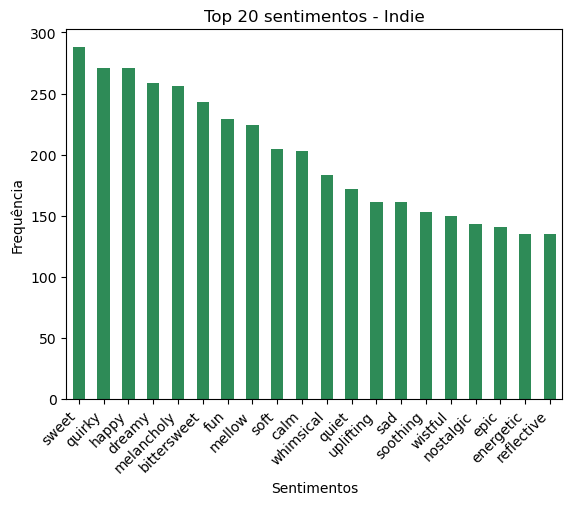

In [288]:
# vamos ver os sentimentos que mais aparecem para os gêneros que mais aparecem

# indie

df_indie_sentimento = df_genre_sentimento[df_genre_sentimento["genre"] == "indie"]
freq_indie = df_indie_sentimento[df_indie_sentimento.columns[1:]].sum()
freq_indie.sort_values(ascending= False, inplace = True)
indie_top_sentimentos = freq_indie.head(20)
indie_top_sentimentos.plot.bar(color = "#2E8B57")
plt.xlabel("Sentimentos")
plt.ylabel("Frequência")
plt.title("Top 20 sentimentos - Indie")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

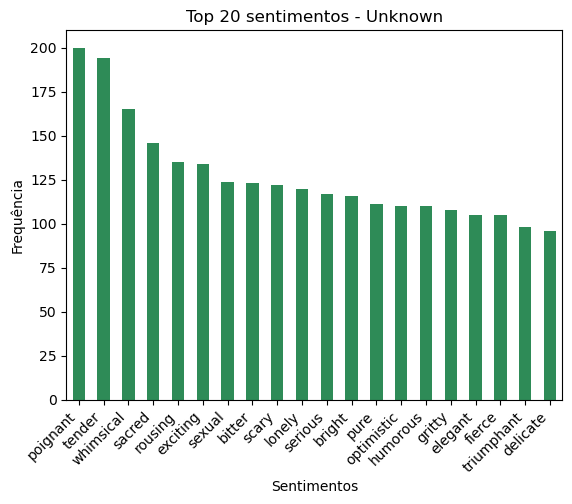

In [290]:
# vamos ver os sentimentos que mais aparecem para os gêneros que mais aparecem

# unknown

df_unknown_sentimento = df_genre_sentimento[df_genre_sentimento["genre"] == "unknown"]
freq_unknown = df_unknown_sentimento[df_unknown_sentimento.columns[1:]].sum()
freq_unknown.sort_values(ascending= False, inplace = True)
unknown_top_sentimentos = freq_unknown.head(20)
unknown_top_sentimentos.plot.bar(color = "#2E8B57")
plt.xlabel("Sentimentos")
plt.ylabel("Frequência")
plt.title("Top 20 sentimentos - Unknown")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

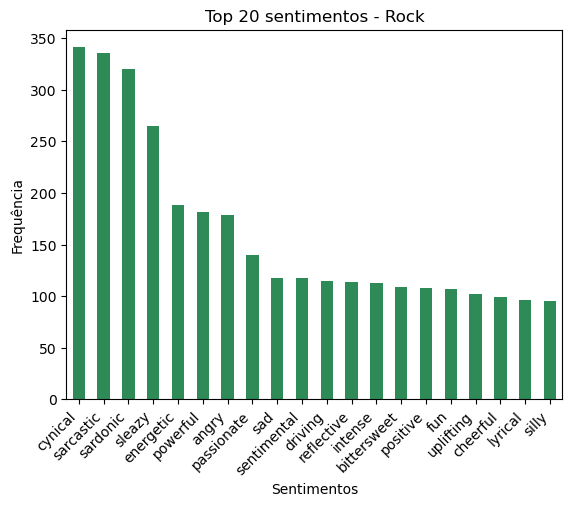

In [291]:
# vamos ver os sentimentos que mais aparecem para os gêneros que mais aparecem

# rock

df_rock_sentimento = df_genre_sentimento[df_genre_sentimento["genre"] == "rock"]
freq_rock = df_rock_sentimento[df_rock_sentimento.columns[1:]].sum()
freq_rock.sort_values(ascending= False, inplace = True)
rock_top_sentimentos = freq_rock.head(20)
rock_top_sentimentos.plot.bar(color = "#2E8B57")
plt.xlabel("Sentimentos")
plt.ylabel("Frequência")
plt.title("Top 20 sentimentos - Rock")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

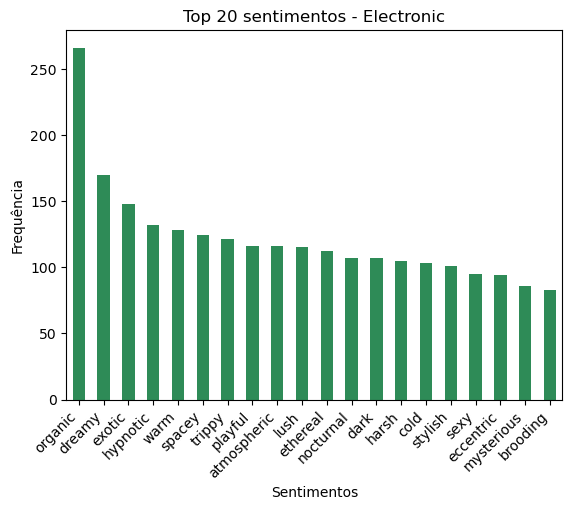

In [292]:
# vamos ver os sentimentos que mais aparecem para os gêneros que mais aparecem

# electronic

df_electronic_sentimento = df_genre_sentimento[df_genre_sentimento["genre"] == "electronic"]
freq_electronic = df_electronic_sentimento[df_electronic_sentimento.columns[1:]].sum()
freq_electronic.sort_values(ascending= False, inplace = True)
electronic_top_sentimentos = freq_electronic.head(20)
electronic_top_sentimentos.plot.bar(color = "#2E8B57")
plt.xlabel("Sentimentos")
plt.ylabel("Frequência")
plt.title("Top 20 sentimentos - Electronic")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

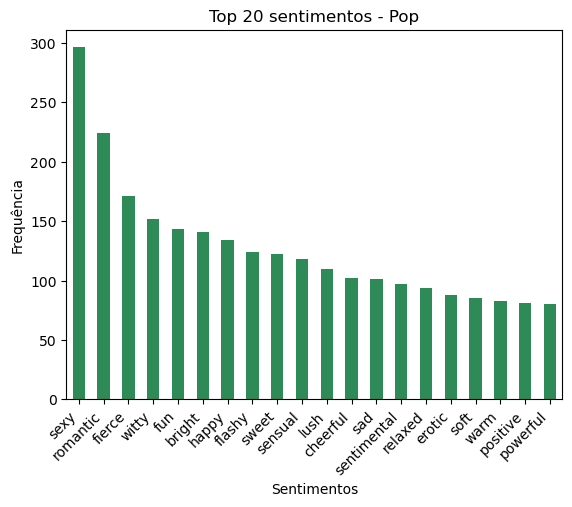

In [294]:
# vamos ver os sentimentos que mais aparecem para os gêneros que mais aparecem

# pop

df_pop_sentimento = df_genre_sentimento[df_genre_sentimento["genre"] == "pop"]
freq_pop = df_pop_sentimento[df_pop_sentimento.columns[1:]].sum()
freq_pop.sort_values(ascending= False, inplace = True)
pop_top_sentimentos = freq_pop.head(20)
pop_top_sentimentos.plot.bar(color = "#2E8B57")
plt.xlabel("Sentimentos")
plt.ylabel("Frequência")
plt.title("Top 20 sentimentos - Pop")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

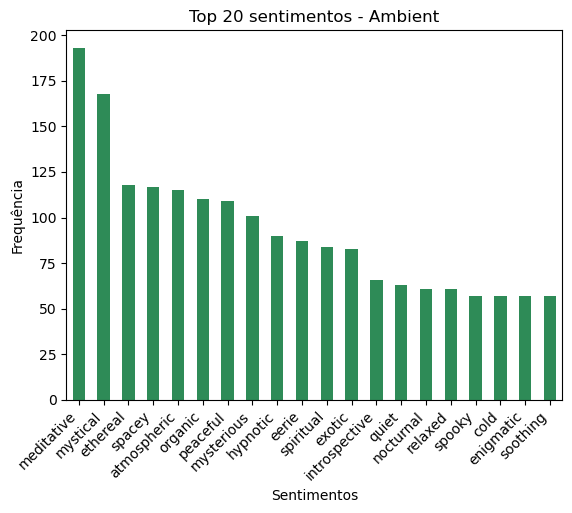

In [293]:
# vamos ver os sentimentos que mais aparecem para os gêneros que mais aparecem

# ambient

df_ambient_sentimento = df_genre_sentimento[df_genre_sentimento["genre"] == "ambient"] 
freq_ambient = df_ambient_sentimento[df_ambient_sentimento.columns[1:]].sum()
freq_ambient.sort_values(ascending= False, inplace = True)
ambient_top_sentimentos = freq_ambient.head(20)
ambient_top_sentimentos.plot.bar(color = "#2E8B57")
plt.xlabel("Sentimentos")
plt.ylabel("Frequência")
plt.title("Top 20 sentimentos - Ambient")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

## Estatísticas

In [9]:
# construindo datasets para construir estatísticas

df_estatisticas = dados[dados.columns[3:7]].copy()
df_estatisticas_indie = df_estatisticas[df_estatisticas["genre"] == "indie"]
df_estatisticas_unknown = df_estatisticas[df_estatisticas["genre"] == "unknown"]
df_estatisticas_rock  = df_estatisticas[df_estatisticas["genre"] == "rock"]
df_estatisticas_electronict = df_estatisticas[df_estatisticas["genre"] == "electronict"]
df_estatisticas_pop = df_estatisticas[df_estatisticas["genre"] == "pop"]
df_estatisticas_ambient = df_estatisticas[df_estatisticas["genre"] == "ambient"]


In [317]:
df_estatisticas_indie

,valence_tags,arousal_tags,dominance_tags,genre
40,5.533680,4.276461,5.643792,indie
42,6.007500,4.641050,5.769050,indie
135,5.250000,6.335000,5.745000,indie
199,3.746667,5.276667,5.196667,indie
204,5.135000,5.335000,5.405000,indie
...,...,...,...,...
88944,3.300000,4.780000,4.950000,indie
88951,3.300000,4.780000,4.950000,indie
88999,5.370000,3.450000,5.330000,indie
89012,6.685000,4.405000,5.625000,indie


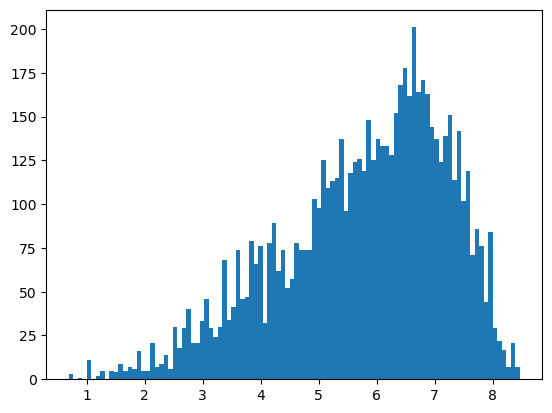

In [312]:
#df_estatisticas_indie

plt.hist(x = df_estatisticas_indie["valence_tags"], bins = 100)
plt.show()

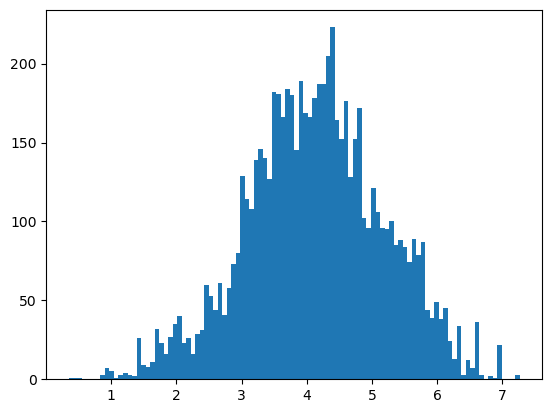

In [310]:
#df_estatisticas_indie

plt.hist(x = df_estatisticas_indie["arousal_tags"], bins = 100)
plt.show()


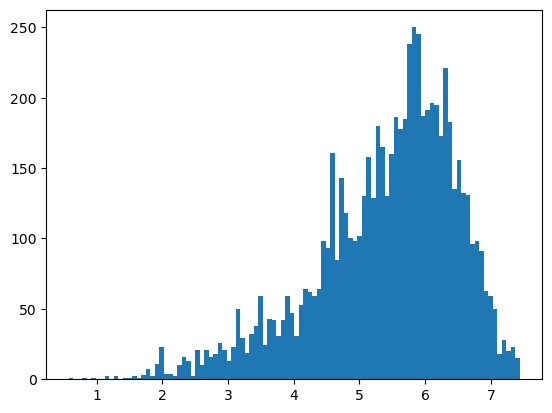

In [313]:
#df_estatisticas_indie

plt.hist(x = df_estatisticas_indie["dominance_tags"], bins = 100)
plt.show()

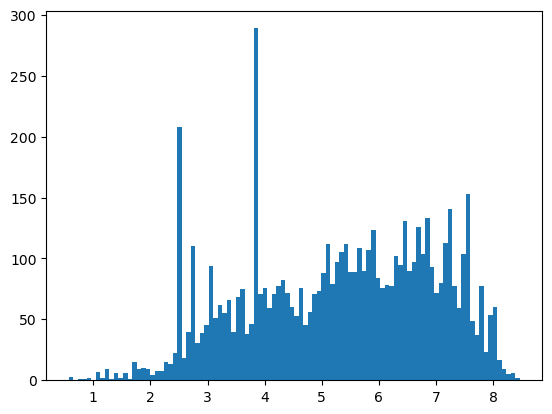

In [319]:
#df_estatisticas_rock

plt.hist(x = df_estatisticas_rock["valence_tags"], bins = 100)
plt.show()

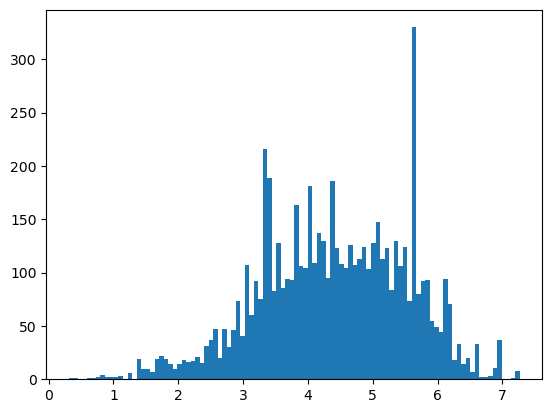

In [320]:
#df_estatisticas_rock

plt.hist(x = df_estatisticas_rock["arousal_tags"], bins = 100)
plt.show()

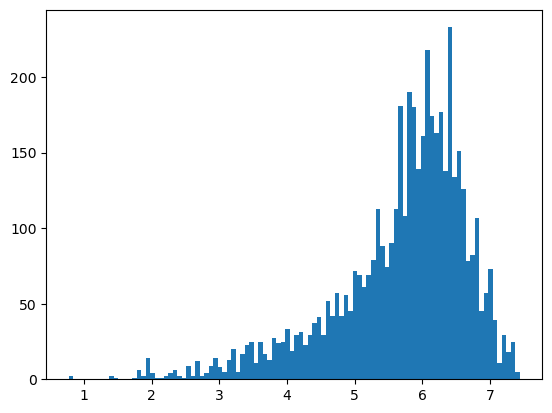

In [12]:
#df_estatisticas_pop

plt.hist(x = df_estatisticas_pop["dominance_tags"], bins = 100)
plt.show()

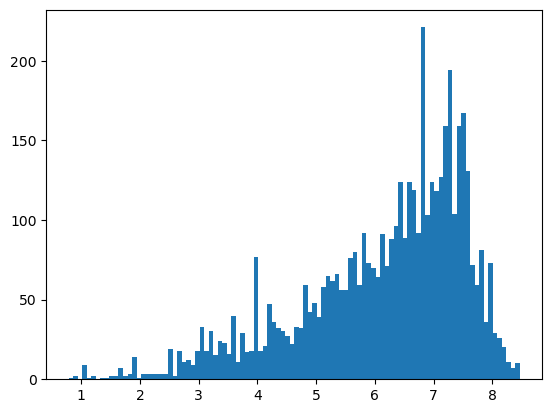

In [13]:
#df_estatisticas_pop

plt.hist(x = df_estatisticas_pop["valence_tags"], bins = 100)
plt.show()

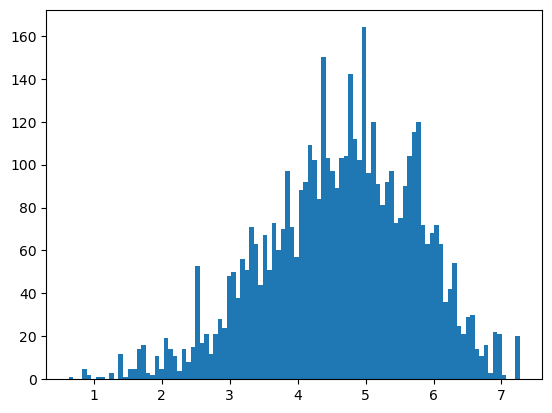

In [14]:
#df_estatisticas_pop

plt.hist(x = df_estatisticas_pop["arousal_tags"], bins = 100)
plt.show()

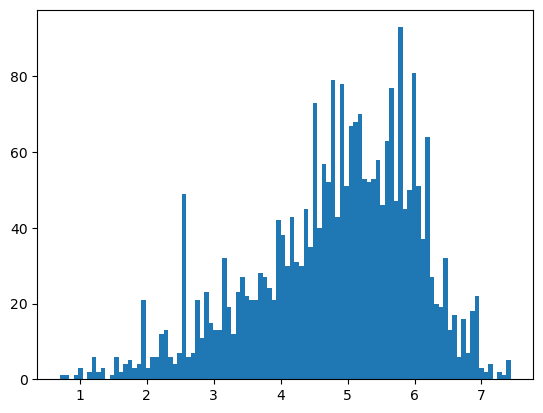

In [15]:
#df_estatisticas_ambient

plt.hist(x = df_estatisticas_ambient["dominance_tags"], bins = 100)
plt.show()

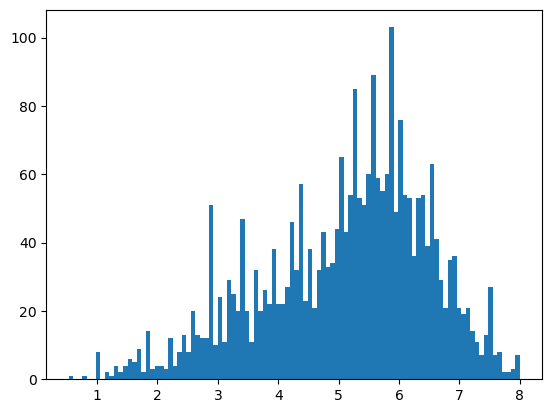

In [16]:
#df_estatisticas_ambient

plt.hist(x = df_estatisticas_ambient["valence_tags"], bins = 100)
plt.show()

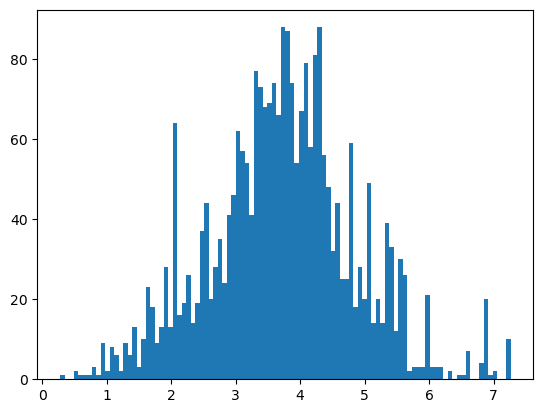

In [17]:
#df_estatisticas_ambient

plt.hist(x = df_estatisticas_ambient["arousal_tags"], bins = 100)
plt.show()